# Antemortem and Postmortem Factors Influencing Brain Tissue Volume

## II. Background
Our understanding of severe mental illness has been greatly advanced through the study of the postmortem human brain tissue (Lewis DA, *Neuropsychopharm.*, 2002; McCullumsmith, *Neuropsychopharm.* 2013). Studies of the postmortem human brain provide insight into the molecular and structural abnormalities which are thought to be the neural substrate for symptoms in these patient populations. Postmortem brain tissue samples are becoming widely recognized as providing ample opportunity to investigate these brain diseases, and a great deal of resources from the National Institute of Mental Health is going towards studies of the postmortem human brain.  

Postmortem studies of human brain provide an important bridge linking animal studies to neuroimaging and other *in vivo* approaches. One example of this link between animal studies and *in vivo* neuroimaging studies is reporting of brain volume abnomralities. There is a significant body of literature to implicate nearly every psychiatric illness with abnormalities in brain tissue volume as reported by structural MRI data, including major depressive disorder (Koolschijin PC et al., *Hum Brain Mapp.* 2009), bipolar disorder (Kempton MJ et al., *Arch Gen Psychiatry.* 2008), schizophrenia (Steen et al., *Br J Psychiatry.*, 2006; Boos et al., *Arch Gen Psychiatry.* 2007), and alcohol use disorder (Bae et al., *Exp Neurobiol.*, 2016). 

The large number of studies that report significant associations of psychiatric diagnosis with brain volume changes could reflect the true association of major mental illness with brain volume abnormalities. However, these findings might also be influenced by a variety of antemortem factors. For example, antipsychotic use has been associated with brain volume loss in monkeys chronically exposed to typical and atypical antipsychotics (Dorph-Petersen et al., *Neuropsychopharm.*, 2005). Moreover, it is widely recognized that the neuroimaging data exhibits a reporting bias in the literature (Ioannidis, *Arch Gen Psychiatry.* 2011). Thus, the abnormalities in brain tissue volume could reflect true biological differences, may be a consequence of other comorbid factors influencing brain tissue volume, or could be a product of excessive reporting bias in the literature.

Understanding how antemortem factors, such as psychiatric diagnosis, drug use, and age, together with other postmortem factors important for brain banking, influence brain tissue volume is of relevance for both clinical and basic scientists. Therefore, the present study sought to characterize the antemortem and postmortem factors influencing brain tissue volume using an existing cohort of highly characterized brain tissue specimens. Our objective was to identify which antemortem and postmortem factors influenced brain tissue volume measured at the time of tissue recovery. Our subject groups included control subjects (CTL) and those diagnosed with alcohol use disorder subjects (ETOH), major depressive disorder (MDD), bipolar disorder (BP), and schizophrenia (SCZ).

## III. Variables
The main variables of interest are diagnostic category (CTL, ETOH, MDD, BP, and SCZ). 

Antemortem biological variables that will be accounted for include sex (M/F), ethnicity, age, duration of illness (in years), cause of death category (natural, accidental drug/alcohol death, traumatic deaths, neurologic-related deaths), suicide, tobacco use at time of death (Y/N), antidepressant use at time of death (Y/N), antipsychotic use at time of death, benzodiazepine use at time of death (Y/N). 

Quantitative variables that will be accounted for include height, weight, BMI, age (years), and duration of illness (years), post-mortem interval (time between death and tissue recovery). 

Random variables that will be accounted for include date of measurement taken and experimenter.

Number of observations:
Control = 186
ETOH = 148
MDD = 168
BP = 26
SCZ = 41

## IV. Hypotheses

We predict that left hemisphere brain tissue volume (our dependent continuous variable $y$) will be significantly different in the SCZ and ETOH groups, but not the MDD and BP groups, from control subjects. We will be using linear regression (rather than classifier models), as volume output is a quantitative continuous variable. This basic 

$y_{volume}$  
$x_{diagnosis}$  
$x_{antipsychotics}$  
$x_{age}$  
$x_{sex}$  
$x_{ETOH}$ or a comorbid alcohol use disorder diagnosis .  


  
The form of the hypothesis that we want to test is as follows: after accounting for the variation in brain volume due to sex and age, how much of the variability in the data is explained by psychiatric diagnosis? Which diagnoses are significantly different than control subjects? In other words:

$ Y_{volume} = \beta_0 + \beta_{diagnosis}x_{diagnosis} + + \beta_{sex}x_{sex} + + \beta_{age}x_{age} + + \beta_{antipsychotics}x_{antipsychotics}+  \beta_{diagnosis*age}x_{diagnosis*age} + \beta_{diagnosis*sex}x_{diagnosis*sex} + \beta_{diagnosis*antipsychotics}x_{diagnosis*antipsychotics} + \beta_{diagnosis*age*antipsychotics}x_{diagnosis*age*antipsychotics} + \epsilon $

## V. Data Organization

The data are organized as a data frame, with the subject identifier in the first column and a number of descriptors.  

The data are drawn from an Access Database and we have *a priori* determined which subjects we want to use. Specifically, we only started collecting brain volumes after subject number HU 1274, so we only want to include values with something higher than HU 1274. The data from Access are exported into an Excel sheet, which will be saved as a .csv and imported into R.

Key data cleansing steps include:
* Indicating the subject identifier as the row names
* In the areas that are blank, filling in "NA" so that there are no missed rows
* There are a lot of columns of data that I will not be interested in studying at this time. For example, all the brain volumes are broken into regional parts (frontal, parietal/temporal dorsal/ventral portions, occipital). For this first analysis, I will remove these columns.
* Many of the diagnoses in the dataframe are listed as DSM-IV codes that will be challenging to interpret. Thus, I will transform these columns into Yes/No binary options and organize into the following groups:
    + Alcohol Use Disorder
    + Mood Symptoms (important for schizophrenia subjects to differentiate between schizoaffective and schizophrenia)
+ 


## VI. Analysis

In [19]:
library(tidyverse)

In [39]:
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  323.9   519.9   570.2   567.2   612.0   727.6       2 

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

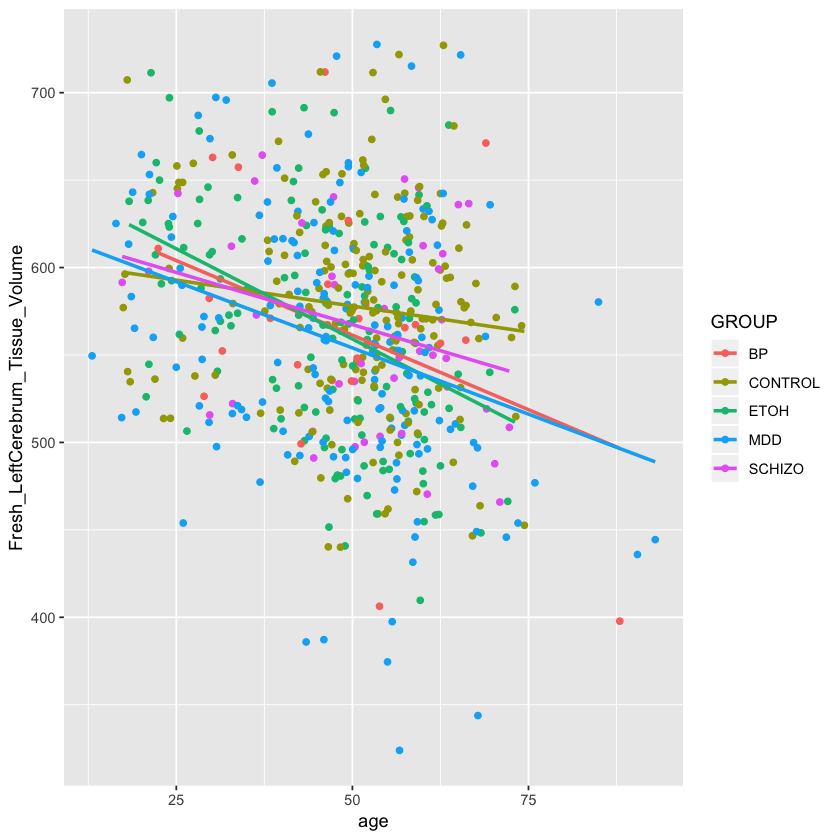

In [28]:
Volume_V1 <- read.csv("Volume_V1.csv", header=TRUE)
summary(Volume_V1$Fresh_LeftCerebrum_Tissue_Volume)
ggplot(aes(age, Fresh_LeftCerebrum_Tissue_Volume, col=GROUP), data = Volume_V1) + 
geom_point() +
geom_smooth(method = 'lm', se = F)

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

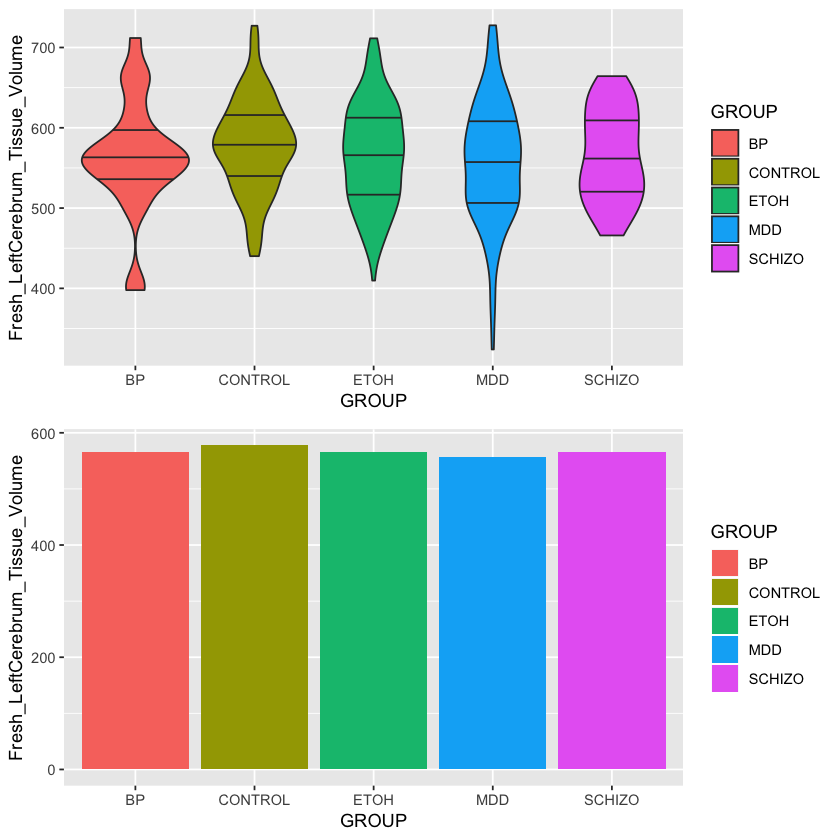

In [44]:
box <- ggplot(aes(GROUP, Fresh_LeftCerebrum_Tissue_Volume, fill = GROUP), data = Volume_V1) +
geom_violin(draw_quantiles=c(0.25, 0.5, 0.75))
bar <- ggplot(aes(GROUP, Fresh_LeftCerebrum_Tissue_Volume, fill = GROUP), data = Volume_V1) +
stat_summary(fun.y="mean", geom="bar")
grid.arrange(box, bar, nrow = 2)

In [12]:
lmvol <- lm(Fresh_LeftCerebrum_Tissue_Volume ~ GROUP, data = Volume_V1)
summary(lmvol)


Call:
lm(formula = Fresh_LeftCerebrum_Tissue_Volume ~ GROUP, data = Volume_V1)

Residuals:
     Min       1Q   Median       3Q      Max 
-233.623  -44.081    0.853   45.739  170.077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  565.0077    12.7166  44.431   <2e-16 ***
GROUPCONTROL  12.6396    13.5854   0.930    0.353    
GROUPETOH      0.9072    13.7885   0.066    0.948    
GROUPMDD      -7.4851    13.6653  -0.548    0.584    
GROUPSCHIZO    0.4777    16.2562   0.029    0.977    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.84 on 562 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01513,	Adjusted R-squared:  0.008122 
F-statistic: 2.159 on 4 and 562 DF,  p-value: 0.07237


In [13]:
summary(Volume_V1$GROUP)

BP CONTROL    ETOH     MDD  SCHIZO 
     26     186     148     168      41

In [17]:
?dlply

In [20]:
model <- dlply(Volume_V1, "GROUP", function(df)
lm(Fresh_LeftCerebrum_Tissue_Volume ~ GROUP, data = df))

ERROR: Error in dlply(Volume_V1, "GROUP", function(df) lm(Fresh_LeftCerebrum_Tissue_Volume ~ : could not find function "dlply"


In [21]:
summary(Volume_V1$Fresh_LeftCerebrum_Tissue_Volume)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  323.9   519.9   570.2   567.2   612.0   727.6       2 

In [30]:
# better way to import, with cleansing steps
VolumeClean <- read.csv("Volume_V1.csv", header=TRUE, row.names = "HU_NUM", na.strings=c("","NA"))
#next steps are to eliminate unneeded dimensions in the dataset and to create row subsets based on group diagnosis.

## VII. Conclusions